In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [26]:
file = pd.read_csv(r"D:\Jonas\Documents\visua\python\novoProjeto\Projetoyt\data\raw\Avaliação_Mensal_Funcionários.csv", decimal= ',')
file

,Cargo,Setor,Salário Bruto,Tipo de Contratação,Carga Horária por dia,Formação,Idade,NPS interno
0,Cientista de Dados,Dados,6000,CLT,8,Bacharel,24,9.0
1,Cientista de Dados,Dados,6500,CLT,8,Bacharel,26,9.6
2,Analista de Dados,Dados,5000,CLT,8,Bacharel,29,8.0
3,Analista de Dados,Dados,5800,CLT,8,Bacharel,36,9.0
4,Analista de Dados,Dados,7000,CLT,8,Bacharel,32,9.4
...,...,...,...,...,...,...,...,...
67,Gerente de Marketing,Marketing,6000,CLT,8,Bacharel,46,9.0
68,Coordenador de Marketing,Marketing,8000,CLT,8,Bacharel,45,9.0
69,Gerente Comercial,Marketing,8000,CLT,8,Bacharel,32,9.4
70,Gerente Comercial,Marketing,8000,CLT,8,Bacharel,40,9.6


In [27]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cargo                  72 non-null     object 
 1   Setor                  72 non-null     object 
 2   Salário Bruto          72 non-null     int64  
 3   Tipo de Contratação    72 non-null     object 
 4   Carga Horária por dia  72 non-null     int64  
 5   Formação               72 non-null     object 
 6   Idade                  72 non-null     int64  
 7   NPS interno            72 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 4.6+ KB


In [29]:
file.groupby('Setor')

In [30]:
sector = file.groupby('Setor')

In [31]:
type(file)

pandas.core.frame.DataFrame

In [32]:
type(sector)

pandas.core.groupby.generic.DataFrameGroupBy

In [33]:
len(file)

72

In [34]:
len(sector)

5

In [35]:
file['Setor']

0         Dados
1         Dados
2         Dados
3         Dados
4         Dados
        ...    
67    Marketing
68    Marketing
69    Marketing
70    Marketing
71    Marketing
Name: Setor, Length: 72, dtype: object

In [36]:
file['Setor'].nunique()

5

In [37]:
#file['Setor'].unique()
file['Setor'].sort_values().unique().tolist()

['Adm-Fin',
 'Dados',
 'Engenharia de Software',
 'Engenheiro de Software',
 'Marketing']

In [38]:
sector.size()

Setor
Adm-Fin                    5
Dados                     35
Engenharia de Software    15
Engenheiro de Software     3
Marketing                 14
dtype: int64

In [39]:
file['Setor'].value_counts()

Setor
Dados                     35
Engenharia de Software    15
Marketing                 14
Adm-Fin                    5
Engenheiro de Software     3
Name: count, dtype: int64

In [40]:
sector.groups #mostra os indices que compoem 

{'Adm-Fin': [21, 22, 23, 24, 25], 'Dados': [0, 1, 2, 3, 4, 5, 6, 7, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], 'Engenharia de Software': [15, 16, 17, 18, 19, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63], 'Engenheiro de Software': [20, 58, 64], 'Marketing': [8, 9, 10, 11, 12, 13, 14, 65, 66, 67, 68, 69, 70, 71]}

In [41]:
file.loc[21]

Cargo                    Analista Administrativo
Setor                                    Adm-Fin
Salário Bruto                               7000
Tipo de Contratação                          CLT
Carga Horária por dia                          8
Formação                                Bacharel
Idade                                         38
NPS interno                                  9.0
Name: 21, dtype: object

In [42]:
sector.max() #min()

,Cargo,Salário Bruto,Tipo de Contratação,Carga Horária por dia,Formação,Idade,NPS interno
Setor,,,,,,,
Adm-Fin,Gerente Administrativo,13000,CLT,8,Bacharel,52,9.0
Dados,Tech Lead,20000,PJ,8,Mestre,48,9.8
Engenharia de Software,Tech Lead,18000,PJ,8,Mestre,30,9.6
Engenheiro de Software,Engenheiro BackEnd,9000,PJ,8,Bacharel,38,8.5
Marketing,Gerente de Marketing,8000,PJ,8,Mestre,46,9.6


In [63]:
file.Setor.replace(to_replace="Engenheiro de Software", value= "Engenharia de Software", inplace=True)

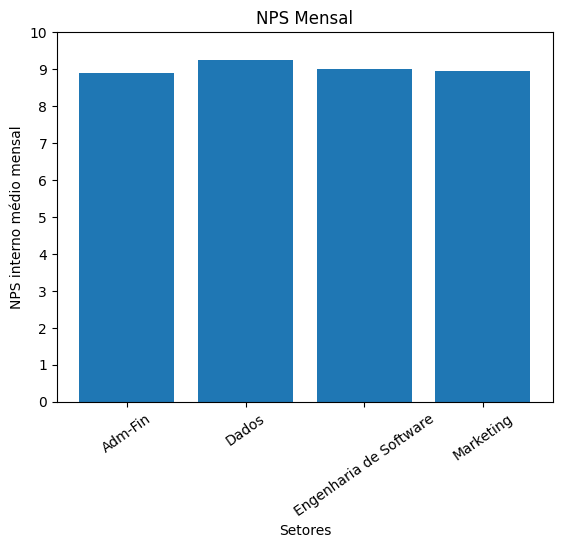

In [79]:
setores = file.groupby(['Setor']).mean(numeric_only=True)["NPS interno"].index
valores_nps_medio = file.groupby(['Setor']).mean(numeric_only=True)["NPS interno"].values
plt.bar(setores, valores_nps_medio)
plt.xlabel("Setores")
plt.ylabel("NPS interno médio mensal")
plt.xticks(rotation = 35)
plt.yticks(np.array(range(0,11,1)))
plt.title("NPS Mensal");

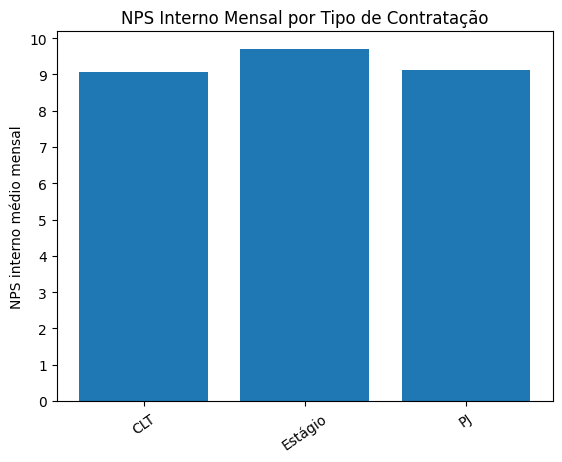

In [82]:
TipoContratacao = file.groupby(['Tipo de Contratação']).mean(numeric_only=True)["NPS interno"].index
nps_medio_tipo_contratacao = file.groupby(['Tipo de Contratação']).mean(numeric_only=True)["NPS interno"].values
plt.bar(TipoContratacao, nps_medio_tipo_contratacao)
#plt.xlabel("Setores")
plt.ylabel("NPS interno médio mensal")
plt.xticks(rotation = 35)
plt.yticks(np.array(range(0,11,1)))
plt.title("NPS Interno Mensal por Tipo de Contratação");

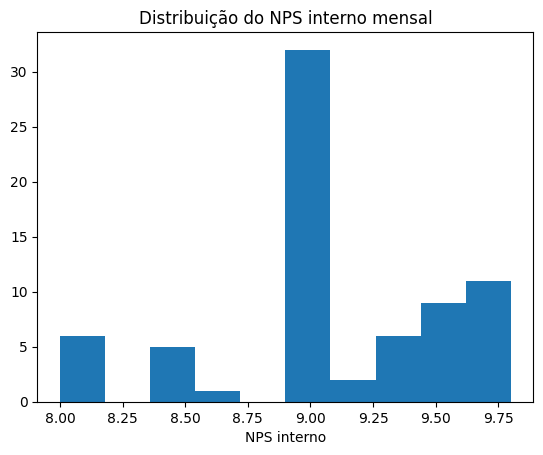

In [85]:
plt.hist(file["NPS interno"])
plt.xlabel("NPS interno")
plt.title("Distribuição do NPS interno mensal");